# ¿Cuál es la mejor tarifa?




Como analista para el operador de telecomunicaciones Megaline. Realizare este analisis de manera meticulosa, tomando en cuenta en concreto lo que se requiere desde un inicio. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Procediendo primeramente por realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Empezare con los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. El obejetivo con esta informacion es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El proposito del siguiente proyecto, consiste en la optimizacion del presupuesto para generar una publicidad que se enfoque en los planes de servicio que genera mayor cantidad de ingresos para la empresa.

Observamos la informacion  general de los datos proporcionados por nuestra muestra representattiva, con el objetivo de verificar si contamos con una informacion confiable o si es necesario realizar alguna preperacion previa o correccion necesaria para dar resultados mas eficases.

## Inicialización

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

## Cargar datos

In [18]:
megaline_calls = pd.read_csv('../data/megaline_calls.csv')
megaline_internet = pd.read_csv('../data/megaline_internet.csv')
megaline_messages = pd.read_csv('../data/megaline_messages.csv')
megaline_plans = pd.read_csv('../data/megaline_plans.csv')
megaline_users = pd.read_csv('../data/megaline_users.csv')


## Preparar los datos

In [19]:
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [20]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [21]:
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [22]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [23]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


La informacion se obserba bien en primera instancia se . Sin embargo es siempre importante realizar un preprocesamiento para verficar que nuestros valores sean confiables sobretodo, y despues obetener alguna muestra representativa de  cada una de  nuestras tablas para analizar el comportamiento de los usuarios en cada uno de sus planes

## Tarifas

In [24]:
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [25]:
megaline_plans.sample(2)  

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Este DataFrame maneja unicamente 2 columnas representativas en las cuales nos vamos a basar para llegar a conclusiones mas concretas, agrupandola con el resto de Dataframes y observando los comportaminetos de los clientes segun el plan que manejen.

Observando nuestra tabla de planes. En la cual nos basaremos para facturar los servicios, es importante tomar en cuenta que, el trafico de internet es medido en Gigabytes usados pero son contados en megabytes utilizados, para solucionar esto realizaremos un transformacion en el la tabla  qeu mide el trafico de internet.

In [26]:
megaline_internet['gb_used'] = megaline_internet['mb_used']/1024
megaline_internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


## Corregir datos


Verificamos valores usentes y duplicados en nuestra tabla de tarifas

In [27]:
megaline_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Es bastante obvio que no vamos encontrar valores ausentes en esta tabla ya que contiene los terminos y las tarifas de cada uno de los planes, y si tuviera algun valor ausente significaria que se esta icumpliendo un paquete del plan especifico.

In [28]:
megaline_plans.duplicated()

0    False
1    False
dtype: bool

In [29]:
megaline_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


No hemos encontrado valores ausentes o duplicados en este DataFrame, podria parecer uqe todo esta bien, incluso puede ser normal que los valores que se nos presentan en la descripcion de los datos vallan de forma decsendente


Vamos a conservar los valores de las tarifas y los planes de este conjunto de datos, Mas que nada para que nuestros datos no presenten resultados atipicos mas adelante, si embargo si es necesario para lleagar conclusiones mas esperadas,se realizara la modificasion pertinente

## Usuarios/as

In [30]:
megaline_users.info()# Imprime la información general/resumida sobre el DataFrame de usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [31]:
megaline_users.sample(10)# Imprime una muestra de datos para usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
343,1343,Teresia,Ewing,43,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-23,surf,NaN
268,1268,Britni,Bowers,33,"Fresno, CA MSA",2018-01-13,surf,NaN
133,1133,Larry,Barr,50,"Cincinnati, OH-KY-IN MSA",2018-07-21,ultimate,NaN
218,1218,Stanford,Pena,23,"Bakersfield, CA MSA",2018-01-16,surf,NaN
56,1056,Denis,Chandler,33,"Cincinnati, OH-KY-IN MSA",2018-03-01,surf,NaN
442,1442,Terrell,Caldwell,66,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-25,ultimate,NaN
197,1197,Lon,Parker,56,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,surf,NaN
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaN
174,1174,Larisa,Ellis,67,"Cleveland-Elyria, OH MSA",2018-01-28,surf,NaN
478,1478,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,ultimate,NaN


In [32]:
megaline_users.sample(10).isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    9
dtype: int64

In [33]:
megaline_users.sample(10).describe()

,user_id,age
count,10.000000,10.000000
mean,1277.900000,45.200000
std,127.664882,18.353322
min,1027.000000,19.000000
25%,1219.500000,36.250000
50%,1270.000000,38.500000
75%,1354.750000,56.500000
max,1465.000000,74.000000


Observamos valores ausentes en la columna de fecha de abandono, y si los  hay significa que aun siguen con su plan, son clientes que siguen comprando planes de megaline y sobre los que podemos trabajar ya que continuan con el servicio

### Corregir los datos

En este apartado vamos a denotar los valores que tienen una fecha de abandono de su plan sobre los cuales no vamos a poder trabajar ya que cacelaron o abandonaron su plan de servicio previamente

In [34]:
megaline_users.sample(10).isna().count()

user_id       10
first_name    10
last_name     10
age           10
city          10
reg_date      10
plan          10
churn_date    10
dtype: int64

De esta manera en nuestra muestra podemos observar la cantidad de usurios que no manejan su plan activo, ya que el conteo se realiza unicamnete para los valores no ausentes, y si estos presentan una fecha. significa que hasta entonces  estuvienron manteniendo su plan.

### Enriquecer los datos

El atributo mes de la lista de usuarios, no corresponde al mes de los servicios y ya que  el objetivo es poder relacionarla con la tabla que contiene los terminos para cada uno de los planes en especifico, no extraeremos el atributo month de la tabla de usuarios.

In [35]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



Obtenemos el mes de esta tabla de usuarios y la agregamos como columna a nuestro DataFrame, ya que la tabla que contiene las tarifas de cada un de los planes, genera facturas por cada mes de uso. Asi que despues de transformar la columna a objeto Datetime, obtuvimos el mes de uso para cada cliente.

## Llamadas

In [36]:
megaline_calls.info()# Imprime la información general/resumida sobre el DataFrame de las llamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [37]:
megaline_calls.sample(10)

,id,user_id,call_date,duration
39075,1145_322,1145,2018-09-23,1.43
75540,1268_44,1268,2018-07-05,0.52
97555,1348_146,1348,2018-12-02,17.01
73669,1261_443,1261,2018-08-05,14.46
28514,1109_141,1109,2018-09-05,8.74
58650,1212_51,1212,2018-12-30,10.48
48973,1176_72,1176,2018-11-09,0.00
34384,1127_232,1127,2018-09-11,6.41
108725,1384_34,1384,2018-11-10,14.77
129015,1465_191,1465,2018-10-25,11.91


In [38]:
megaline_calls.sample(10).isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [39]:
megaline_calls.sample(10).duplicated().sum()

0

tenemos datos de tipos enteros de tipos objetos de puntos de coma flotante, en esta tabla ya que representa la cantidad, duracion fecha y fecha de adquicision del plan de llamadas para cada uno de los usuarios. en este caso puede ser necesario realizar un redondeo de la duracion de llamadas los cuates estan en numero de coma flotante a datos de tipo enteros ya que los planes de llamdas cuentan los minutos utlizados por completo, mas no los segundos adicionales qeu duro cada llamada en especifico

### Corregir los datos

Despues de revisar la suma delos datos duplicados y ausentes, observamos que tenemos por el momento en orden los datos de la tabla de llamadas.Posteriormente realizaremos la transformacion pertinente para la duracion de cada una, Sin embargo tambien puede ser prudente realizar una descripcion de la muestra de datos para observar infromacion importante de la misma.

In [40]:
megaline_calls.sample(10).describe()

,user_id,duration
count,10.000000,10.000000
mean,1210.900000,7.715000
std,75.079883,5.440591
min,1054.000000,0.270000
25%,1192.250000,4.467500
50%,1225.000000,7.565000
75%,1258.500000,11.080000
max,1295.000000,16.060000






Tenemos buenos conteos y buenas medias, podemos notar tambien que los valores maximos aluden mas a los usuarios  que en la duracion asi que podriamos encontrarnos mas adelante con valores atipicos en esta columna.

### Enriquecer los datos

Transformamos y obetnemos el los mese que cada usuario ha mantedido su plan de servicios activo, para poder realcionarlo en con la tabla que contiene las tarifas para cada mes de uso de cada plan. 

In [41]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%d')

megaline_calls['month'] = megaline_calls['call_date'].dt.month

megaline_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


Una vez que extraemos el mes del plan de llamadas, notamos que la duracion de estas, esta compuesta por minutos y segundos de duracion.Sin embargpo las tarifas de cada plan se enfocan en los minutos que se le da al usuario para poder facturar. Asi que puede ser prudente redondear la duracion de los segundos, al minuto de llamada, para que este acorde a la tarifa de  plan que maneja.

In [42]:
megaline_calls['duration_v2'] = megaline_calls['duration']
megaline_calls['duration_v2'] = np.ceil(megaline_calls['duration'])
megaline_calls.head()

,id,user_id,call_date,duration,month,duration_v2
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


De esta manera tenemos una vision mas acorde al plan de minutos de llamada de cada uno de los usuarios y podremos verificar de manera mas eficaz, si cumplio o si supero el cupo limite de minutos de su plan de llamadas.

## Mensajes

In [43]:
megaline_messages.info()# Imprime la información general/resumida sobre el DataFrame de los mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [44]:
megaline_messages.sample(10)

,id,user_id,message_date
18739,1121_66,1121,2018-12-21
30778,1193_539,1193,2018-08-19
74777,1484_251,1484,2018-12-10
60069,1381_182,1381,2018-12-13
71000,1462_108,1462,2018-11-29
73266,1470_894,1470,2018-07-24
46388,1316_243,1316,2018-12-12
8435,1061_441,1061,2018-10-10
4928,1045_300,1045,2018-12-05
68783,1445_11,1445,2018-05-11


In [45]:
megaline_messages.sample(10).isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [46]:
megaline_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [47]:
megaline_messages.sample(10).duplicated().sum()

0

In [48]:
megaline_messages.duplicated().sum()

0

Tanto en la muestra como en la tabla de los valores completos de nuestros datos. No encontramos valores duplicados ni ausentes por lo cual podremos, de momento confiar en que los datos  de mensajes que tenemos, son de usuarios de Megaline,aun asi no descartamos la posibilidad de  econtramos o no con algun valor atipico mas adelnate. 

### Corregir los datos

Para finalizar realizamos una descripcion general de la muestra y tambien de nustra tabla de datos completa para verificar si notamos alguna incontingecia

In [49]:
megaline_messages.sample(10).describe()

,user_id
count,10.00000
mean,1237.70000
std,136.18374
min,1052.00000
25%,1116.75000
50%,1242.50000
75%,1367.50000
max,1398.00000


In [50]:
megaline_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Notamos diferencias obvias en las descripciones de cada una de las tablas, es normal encontrarnos con valores mas elevados en el la tabla copleta que en la mustra, debido a que manejamos mayor cantidad de datos en la tabla general.

### Enriquecer los datos

Transformamos y obetenemos el el mes de uso de los mensajes de cada usuario. Esto nos sera util al para que sea muhcho mas facil al mometnto de relacionarla con al resto de tablas.

In [51]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%d')

megaline_messages['month'] = megaline_messages['message_date'].dt.month

megaline_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12



## Internet

In [52]:

megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
 4   gb_used       104825 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ MB


In [53]:
megaline_internet.sample(10)

,id,user_id,session_date,mb_used,gb_used
94243,1439_296,1439,2018-06-12,352.58,0.344316
15250,1069_2,1069,2018-10-15,48.09,0.046963
35736,1160_440,1160,2018-09-08,455.93,0.445244
91315,1420_208,1420,2018-11-26,885.87,0.865107
88421,1408_140,1408,2018-05-10,464.24,0.453359
98267,1465_105,1465,2018-09-28,316.72,0.309297
64975,1299_263,1299,2018-07-02,603.36,0.589219
31669,1144_405,1144,2018-07-27,831.45,0.811963
90963,1418_227,1418,2018-11-23,722.63,0.705693
102126,1489_138,1489,2018-11-22,575.74,0.562246


Tenemos columnas de datos de tipos punto de coma flotante y enteros en su mayoria debemos realizar algunas transformaciones para poder trabajar de mejor manera, pero antes vamos examinar la estructura de datos mas a fondo.

### Corregir los datos

Verificamos valores ausentes o duplicados 

In [54]:
megaline_internet.sample(10).isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
gb_used         0
dtype: int64

In [55]:
megaline_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
gb_used         0
dtype: int64

In [56]:
megaline_internet.sample(10).duplicated().sum()

0

In [57]:
megaline_internet.duplicated().sum()

0

Al no encontrar valores ausentes o duplicados ni en la muestra ni en nuestra poblacion de datos completa, solo nos resta realizar una descripcion general de nustras datos para nuestro plan de internet.

In [58]:
megaline_internet.describe()

,user_id,mb_used,gb_used
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,0.358119
std,142.053913,277.170542,0.270674
min,1000.000000,0.000000,0.000000
25%,1122.000000,136.080000,0.132891
50%,1236.000000,343.980000,0.335918
75%,1367.000000,554.610000,0.541611
max,1499.000000,1693.470000,1.653779


Tenemos buenas metricas para cada una de nustras columnas tenemos buenas metricas, mas adelnate encontraremos valores atipicos esi es que los hay en nuestro grupo de  datos para el plan de internet.

### Enriquecer los datos

Realizamos las transformaciones pertinentes para los tipos de datos que manejamos. Obtenemos el mes en el que cada uno de los usuarios inicio su secion, para poder realizar las agrupaciones y tener un mejor panorama del comportamiento de los usuarios

In [59]:

megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%d')

megaline_internet['month'] = megaline_internet['session_date'].dt.month

megaline_internet.head()

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12


Algo importante a considerar en este paquete es que, segun el plan de internet de el dataframe que tiene las tarifas. El inernet se mide por Gigabytes utilizados, no por por Megabytes, debido a esto tambien podria resultar util realizar esta transformacion para obtener un resultado eficiente mas adelante.

In [60]:
megaline_internet['gb_used'] = megaline_internet['mb_used']/1024
megaline_internet.head()

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12


Asi podremos estudiar la columna de gigabytes utilizados en el DataFrame de una manera mas precisa, en el posible caso que tengamos relacionarla con el DataFrame que contiene las tarifas de cada plan.

## Estudiar las condiciones de las tarifas

Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así vamos imprimir la información de la tarifa para ver una vez más sus condiciones.

In [61]:
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


## Agregar datos por usuario

Ahora que hemos limpiado nustros datos, vamos a agregar los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior

In [62]:
montly_calls_total = (
    megaline_calls
    .groupby(['user_id','month'])['duration_v2']
    .sum()
    .reset_index()
    .rename(columns = {'duration_v2':'call_minutes'})
    )
montly_calls_minutes = (
    megaline_calls
    .groupby(['user_id','month'])['duration_v2']
    .count()
    .reset_index()
    .rename(columns = {'duration_v2': 'total_calls'})
    )
    
display(montly_calls_minutes.head())
display(montly_calls_total.head())

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


,user_id,month,call_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


Al obetner el tiempo en minutos y la cantidad de llamadas realizadas por cada uno de los usuarios. Renombramos dichas columnas para que se puedan diferenciar de mejor manera, y poder trabajar con ellas de manera mas eficaz.

In [63]:
total_calls = montly_calls_minutes.merge(montly_calls_total,on= ['user_id','month'])
display(total_calls.head())

,user_id,month,total_calls,call_minutes
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


Juntamos las dos tablas para tener una vision mas generalizada  de las llamadas que realizo cada usuario y cuantos minutos de duracion tiene cada una de estas, nos servira para obserbar mas a delante de mejor manera.

In [64]:
montly_messages = megaline_messages.groupby(['user_id','month'])['id'].count().reset_index()
montly_messages.head()

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


Realizamos una agrupacion de los mensajes por ususario y el mes para denotar la cantidad de llamadas que hizo cada cliente en cada mes donde [id] representa la cantidad de llamdas realizadas, y [month] el mes en el que realizo cada una de ellas

In [65]:
montly_internet = np.ceil(megaline_internet.groupby(['user_id' , 'month'])['gb_used'].sum().reset_index())
montly_internet.head()

,user_id,month,gb_used
0,1000.0,12.0,2.0
1,1001.0,8.0,7.0
2,1001.0,9.0,14.0
3,1001.0,10.0,22.0
4,1001.0,11.0,19.0


De la misma forma agrupamos los datos del plan de internet por el usuario el mes, sumando los gigabytes utilizados por cada uno de los usuarios cada mes, para tener una vision mas espesifica, segun lo que nos pide cada plan 

Juntamos los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [66]:
total_information = total_calls.merge(montly_messages, on = ['user_id','month'], how = 'outer')
total_information = total_information.merge(montly_internet, on = ['user_id','month'], how = 'outer')
total_information = total_information.merge(megaline_users, on = ['user_id'], how = 'outer')
total_information = total_information.fillna(0)
total_information.head(2)

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000.0,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001.0,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0


De esta manera obtenemos una tabla que contiene la informacion mas precisa y a corde con lo que cada uno de los planes de megaline, nos solicita.

Luego  le unimos la informacion de de los planes de manera meticulosa. Para poder trabajar con una tabla mas general, precisa y limpia

In [67]:
total_information = total_information.merge(megaline_plans, left_on = 'plan', right_on = 'plan_name')
total_information.head(2)

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000.0,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001.0,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,0,50,15360,500,20,10,0.03,0.03,surf


Unimos la informacion del plan a nuestro dataframe general para poder trabajar a partir de un solo dataframe

### Mensajes

Vamos a realizar los calculos necesarios para facturar cada uno de los mensajes que superaron el numero de mensajes que contiene el plan que contrato cada usuario.

In [68]:
total_information.head(2)

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000.0,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001.0,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,0,50,15360,500,20,10,0.03,0.03,surf


Partimos desde nuestra tabla de datos general [total_information], que contiene la informacion completa de cada uno de los susuarios y tambien de los planes con sus respectivas tarifas.

In [69]:
extra_messages = total_information['id'] - total_information['messages_included'] 
extra_messages = extra_messages.fillna(0)

extra_messages = [0 if x < 0 else x for x in extra_messages]
extra_messages = pd.Series(extra_messages) 
total_information['extra_messages'] = extra_messages * total_information['usd_per_message']
total_information.query('extra_messages > 0').head()

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_messages
3,1001.0,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,0,50,15360,500,20,10,0.03,0.03,surf,0.09
21,1007.0,8.0,70.0,456.0,51.0,24.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",...,0,50,15360,500,20,10,0.03,0.03,surf,0.03
23,1007.0,10.0,80.0,645.0,59.0,37.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",...,0,50,15360,500,20,10,0.03,0.03,surf,0.27
57,1014.0,12.0,150.0,1114.0,64.0,8.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,0,50,15360,500,20,10,0.03,0.03,surf,0.42
58,1015.0,12.0,16.0,96.0,68.0,18.0,Beata,Carpenter,26,"Pittsburgh, PA MSA",...,0,50,15360,500,20,10,0.03,0.03,surf,0.54


Realizamos el calculo respectivo para despues mostrar nuestra columna que factura los mensajes de cada usuario que excedio el cupo en su respectivo plan.

Generada nuestra columna de facturacion en los mensages extra de cada uno de los planes para cada usuario, notamos que los usuarios de plan Ultimate tienen menos mesages excedidos en su plan a comparacion los  mensajes exedidos del plan surf que son mayores.

Ahora vamos a generar nustras graficas para los servicios de mensajes de cada uno de los planes, y de la misma forma empeamos con un diagrama de barras. Empezamos agrupando nusto Dataframe por el mes el plan y obenemos la mediana de ['id'], que es la columna que muestra la cantidad de mensajes enviados pora cada usuario emn su respectivo plan.

In [70]:
total_information.columns

Index(['user_id', 'month', 'total_calls', 'call_minutes', 'id', 'gb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'extra_messages'],
      dtype='object')

Exponemos las columnas de nuestra tabla general para realizar el agrupamiento correspondiente y realizar nuestra grafica.

In [71]:
df_1 = total_information.groupby(['month','plan'])['id'].mean().reset_index()
df_1.head()

,month,plan,id
0,0.0,surf,0.0
1,0.0,ultimate,0.0
2,1.0,surf,10.5
3,1.0,ultimate,15.5
4,2.0,surf,12.0


<Axes: xlabel='month'>

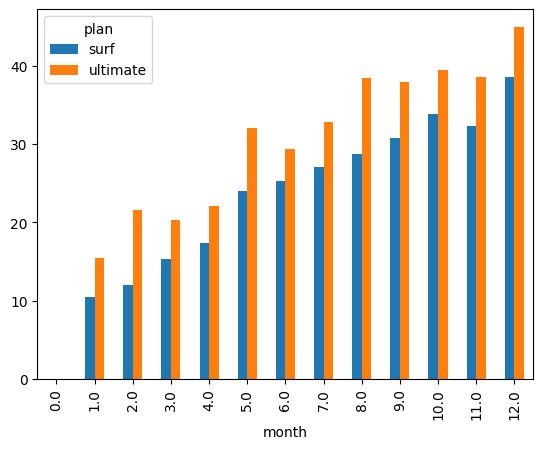

In [72]:
grafik_p1 = df_1.pivot(index = 'month', columns = 'plan', values = 'id')
grafik_p1.plot(kind='bar')

En este grafico observamos una mayor cantidad de mensajes enviados por los uaurios del plan Ultimated, pero tambien hay que tomar en cueta que este plan tienen  menor cantidad de usuarios que el plan Surf,asi que quizas  un grafico de porporcion, asi que un histograma puede resultar en una vision diferente. 

In [73]:
df1_2 = total_information.pivot(index = ['user_id','month'], columns = 'plan', values = 'id')
display(df1_2.head())

plan           surf  ultimate
user_id month                
1000.0  12.0    NaN      11.0
1001.0  8.0    30.0       NaN
        9.0    44.0       NaN
        10.0   53.0       NaN
        11.0   36.0       NaN

array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

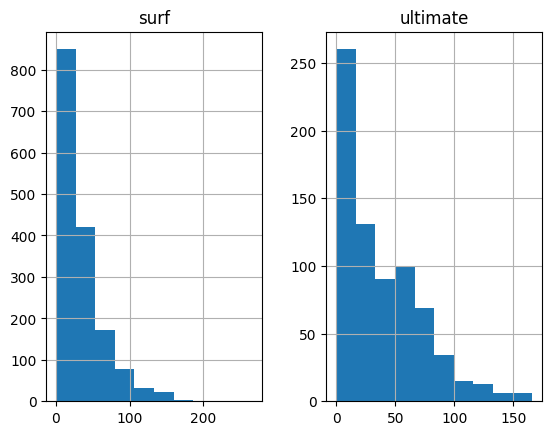

In [74]:
df1_2.hist()

Esta proporcion es muy clara, y nos indica casi la misma informacion del grafico de barras sin embargo a pesar que el plan Surf tiene mayor cantidad de usuarios que el plan Ultimated, observamos una mayor proporcion de mensajes enviados en el grafico que representa el plan Surf. Pero vamos a generar un diagrama de caja para ver la posibilidad de usuarios que excedieron demasiado el cupo limite de mensajes de su plan.

<Axes: >

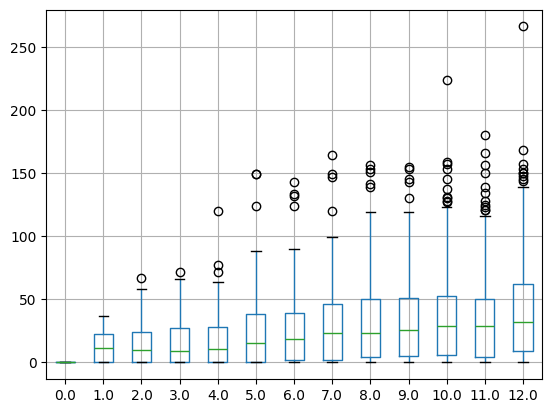

In [75]:
df1_2 = total_information.pivot(index = 'user_id', columns = 'month', values = 'id')
df1_2.boxplot()

El grafico de caja es mas especifico para mostarnos los pocos usuarios que han excedido por mucha diferencia el cupo de sus mensajes en el plan que manejan.

### Internet

In [76]:
extra_gb = total_information['gb_used'] - total_information['mb_per_month_included']/1024
extra_gb = extra_gb.fillna(0)

extra_gb = [0 if x < 0 else x for x in extra_gb]
extra_gb = pd.Series(extra_gb) 
total_information['extra_gb'] = extra_gb * total_information['usd_per_gb']
total_information.query('extra_gb > 0').head()

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_messages,extra_gb
3,1001.0,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,500,20,10,0.03,0.03,surf,0.09,70.0
4,1001.0,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,500,20,10,0.03,0.03,surf,0.00,40.0
5,1001.0,12.0,56.0,412.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,500,20,10,0.03,0.03,surf,0.00,40.0
7,1002.0,11.0,55.0,386.0,32.0,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,50,15360,500,20,10,0.03,0.03,surf,0.00,40.0
9,1003.0,12.0,149.0,1104.0,50.0,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,50,15360,500,20,10,0.03,0.03,surf,0.00,120.0



Ahora hemos creado una columna que facture el trafico de internet utilizado por cada uno de los usuarios que ha excedido los giabytes que contenia su plan. 

Tambien puede ser conveniente realizar graficas sobre el trafico de internet durante los meses de uso de cada uno de los clientes, para tener una vision mas espesifica sobre este servicio en el plan de cada usuario.

In [77]:
total_information.columns

Index(['user_id', 'month', 'total_calls', 'call_minutes', 'id', 'gb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'extra_messages', 'extra_gb'],
      dtype='object')

Exponemos las columnas de nuestra tabla general para realizar el agrupamiento correspondiente y realizar nuestra grafica.

In [78]:
df_2 = total_information.groupby(['month','plan'])['gb_used'].mean().reset_index()
df_2.head()

,month,plan,gb_used
0,0.0,surf,0.000000
1,0.0,ultimate,0.000000
2,1.0,surf,5.000000
3,1.0,ultimate,7.250000
4,2.0,surf,12.222222


<Axes: xlabel='month'>

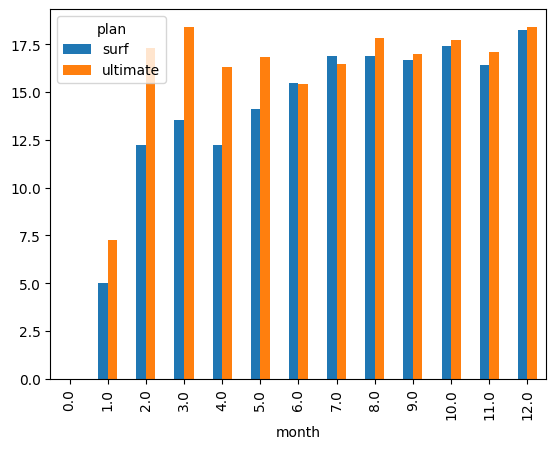

In [79]:
grafik_p2 = df_2.pivot(index = 'month', columns = 'plan', values = 'gb_used')
grafik_p2.plot(kind='bar')

En este aspecto, observamos que el plan Ultimated tiene mas trafico de internet utilizado que el plan surf, sin emargo tambien debemos tomar en cuenta que este plan tiene menor cantidad de usuarios que el plan Surf, asi que un histograma nos puede dar otro punto de vista, basado en proporciones.

In [80]:
df2_1 = total_information.pivot(index = ['user_id','month'], columns = 'plan', values = 'gb_used')
#df2_1 = df2_1.dropna()
display(df2_1.head())

plan           surf  ultimate
user_id month                
1000.0  12.0    NaN       2.0
1001.0  8.0     7.0       NaN
        9.0    14.0       NaN
        10.0   22.0       NaN
        11.0   19.0       NaN

array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

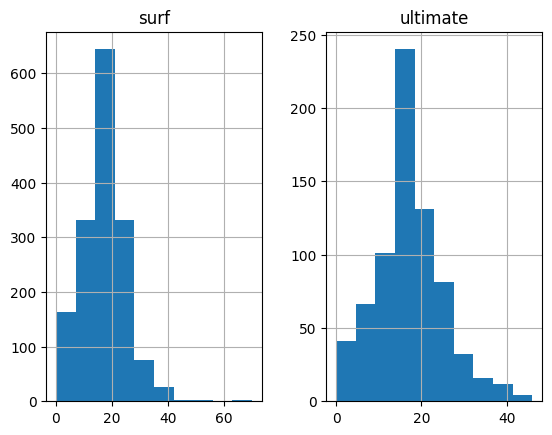

In [81]:
df2_1.hist()



La proporcion de el trafico de internet, muestra un amyor uso para los usuarios que han contratado el plan Surf, aunque tambien tenemos valoes ausentes en el plan Utimated, puede que un drafico de caja nos pueda dar una vision mas especifica de el trafico de internet en los usuarios de cada plan.

In [82]:
df2_2 = total_information.groupby(['month','plan'])['gb_used'].mean().reset_index()
df2_2.head()

,month,plan,gb_used
0,0.0,surf,0.000000
1,0.0,ultimate,0.000000
2,1.0,surf,5.000000
3,1.0,ultimate,7.250000
4,2.0,surf,12.222222


<Axes: >

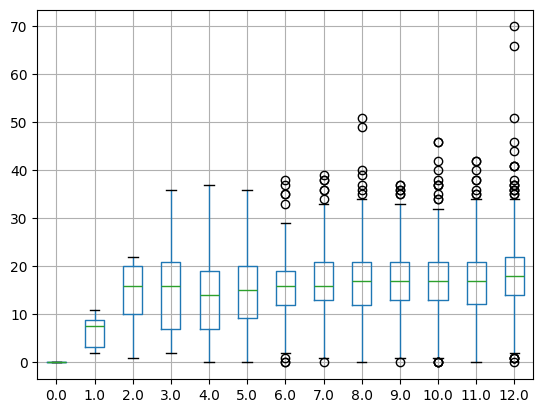

In [83]:
df2_3 = total_information.pivot(index = 'user_id', columns = 'month', values = 'gb_used')
df2_3.boxplot()

Ya con nuestro diagrama de caja observamos que los bigotes se acercan mucho en el ultimo mes a los valores maximos.

De esta manera tendremos toda la informacion de manera mas detallada graficada de cada uno de estos 2 servicos. Solo nos falta calular el servicio de minutos y exponerlos con sus respectivas graficas.

### Llamadas

Luego realizamos el mismo proceso para calcular las llamadas que exeden la cantidad de minutos incluidos en cada uno de los planes.

In [84]:
extra_clls =  total_information['call_minutes'] - total_information['minutes_included']
extra_clls
extra_clls = [0 if x < 0 else x for x in extra_clls]
extra_clls = pd.Series(extra_clls) 
total_information['extra_clls'] = extra_clls* total_information['usd_per_minute']
total_information.query('extra_clls > 0').head(2)

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_messages,extra_gb,extra_clls
9,1003.0,12.0,149.0,1104.0,50.0,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,15360,500,20,10,0.03,0.03,surf,0.00,120.0,18.12
23,1007.0,10.0,80.0,645.0,59.0,37.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",...,15360,500,20,10,0.03,0.03,surf,0.27,220.0,4.35


Antes de mostrar como va quedando nuestra tabla con las columnas agregadas.Estamos haciendo una especificasion en los usuarios que si ecxedieron su total de minutos de llamada para comprobar que se este facturando el valor por minuto extra del plan que corresponde.

In [85]:
total_information.columns

Index(['user_id', 'month', 'total_calls', 'call_minutes', 'id', 'gb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'extra_messages', 'extra_gb',
       'extra_clls'],
      dtype='object')

Exponemos las columnas de nuestra tabla general para realizar el agrupamiento correspondiente y realizar nuestra grafica.

In [86]:
df_3 = total_information.groupby(['month','plan'])['call_minutes'].mean().reset_index()
df_3.head()

,month,plan,call_minutes
0,0.0,surf,0.0
1,0.0,ultimate,0.0
2,1.0,surf,203.0
3,1.0,ultimate,193.5
4,2.0,surf,297.0


Exponemos en primera instancia el dataframe bajo el cual basaremos el grafico de barras.El obejetivo es que este mismo, contenga la duracion de llamadas por cada plan y por cada mes.

<Axes: xlabel='month'>

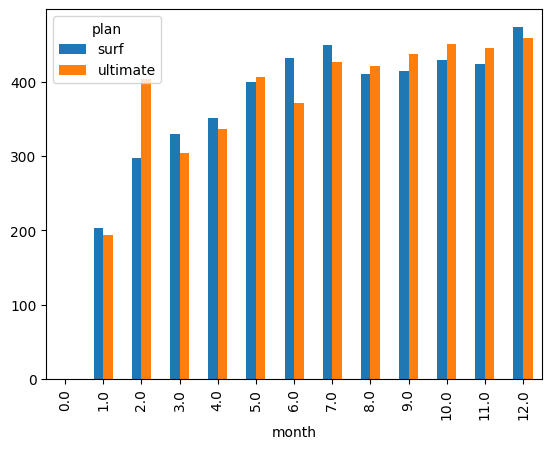

In [87]:
grafik_p3 = df_3.pivot(index = 'month', columns = 'plan', values = 'call_minutes')
grafik_p3.plot(kind='bar')

Las barras nos muestran cierta inclinacion y supremacia por el numero de llamadas en el plan surf, superando al plan ultimate en 7 de los 12 meses del año 2018. Sin embargo no hay que descartar que el plan ultimate aun con menor cantidad de usuarios, supero en 5 meses al plan surf,  y en los ultimos de destaco por mucho.

Comparemos y visualisemos el número de minutos mensuales que necesitan los usuarios de cada plan,atravez de  un histograma.

In [88]:
df3_2 = total_information.pivot(index = ['user_id','month'], columns = 'plan', values = 'call_minutes')
display(df3_2.head())

plan            surf  ultimate
user_id month                 
1000.0  12.0     NaN     124.0
1001.0  8.0    182.0       NaN
        9.0    315.0       NaN
        10.0   393.0       NaN
        11.0   426.0       NaN


De la misma manera, creamos una tabla que muestre todos los datos que queremos visualizar en nuestro histograma.

array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

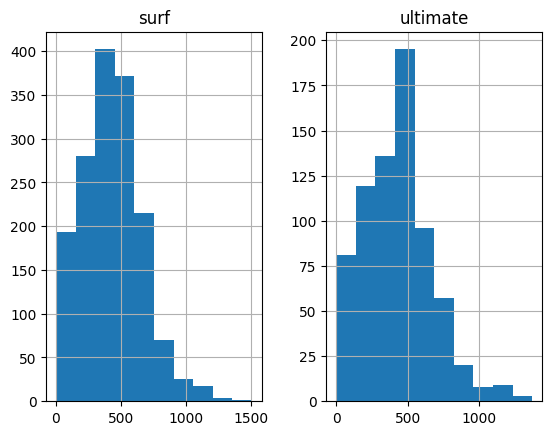

In [89]:
df3_2.hist()

Aunque los graficos parecen ser similares, la cantidad de datos en nuestros ejes demuestra una mayopr cantiadad en el umero de usuarios y minutos que ocupan las llamadas en el plan surf, a comparacion con el plan ultimate.

Una vez realizado los graficos podremos visualizar los datos de cada plan de mejor manera, ahora calcularemos la media y la varianza de la duración mensual de llamadas.

In [90]:
display(total_calls.mean())
display(np.var(total_calls))

user_id         1247.175819
month              9.167405
total_calls       60.998671
call_minutes     435.937555
dtype: float64

c:\Users\edwin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


user_id         20538.462887
month               6.226183
total_calls      1008.941097
call_minutes    53787.336668
dtype: float64

Tenemos buenas medias y una desviasion estandar bastante interesante y a tomar mucho en cuenta en nuestra tabla de datos, que refleja las llamadas totales.

In [91]:
total_calls.head()

,user_id,month,total_calls,call_minutes
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


Para tener un panorama mas general y comprensible de esta tabla, trazaremos  un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.

In [92]:
df3_3 = total_calls.groupby(['month','total_calls'])['call_minutes'].mean().reset_index()
df3_3.head()

,month,total_calls,call_minutes
0,1,5,16.000000
1,1,18,114.000000
2,1,23,181.000000
3,1,42,289.666667
4,2,7,39.000000


Mostramos nuestra tabla agrupada con los datos que queremos denotar en nuestro grafico de caja. Para despues realizar una tabla dinamica con los valores que queremos darle al mismo.

<Axes: >

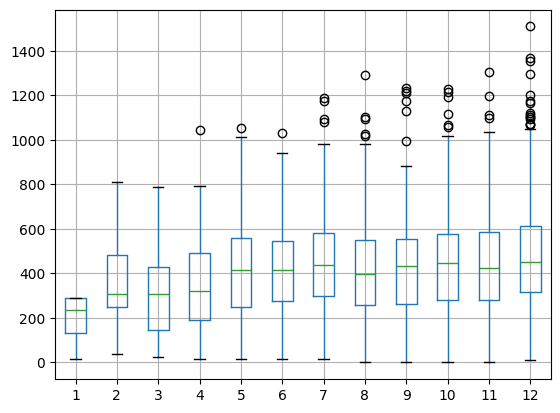

In [93]:
df3_3 = total_calls.pivot(index = 'user_id', columns = 'month', values = 'call_minutes')
df3_3.boxplot()

En este diagarama podremos visualizar un cresimineto progresivo en la duracion de cada una de las llamadas por mes hechas por los usuarios, sobre todo en el ultimo mes donde tenemos bigotes muy por encima de nuestra media de datos.

## Ingreso

Del mismo modo que hemos venido estudiado el comportamiento de los usuarios,ahora describiremos estadísticamente los ingresos de los planes

In [94]:
megaline_fct = total_information['extra_messages'] + total_information['extra_gb'] + total_information['extra_clls'] + total_information['usd_monthly_pay']
total_information['megaline_fct'] = [0 if x < 0 else x for x in megaline_fct]
total_information.query('megaline_fct > 0').head(2)

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_messages,extra_gb,extra_clls,megaline_fct
0,1000.0,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
1,1001.0,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.0,0.0,0.0,20.0


In [95]:
total_information.sort_values(by='user_id')

,user_id,month,total_calls,call_minutes,id,gb_used,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_messages,extra_gb,extra_clls,megaline_fct
0,1000.0,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,0.0,70.00
1,1001.0,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.00,0.0,0.0,20.00
2,1001.0,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.00,0.0,0.0,20.00
3,1001.0,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.09,70.0,0.0,90.09
4,1001.0,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.00,40.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,1498.0,6.0,37.0,238.0,0.0,15.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,500,20,10,0.03,0.03,surf,0.00,0.0,0.0,20.00
2300,1499.0,10.0,53.0,385.0,0.0,20.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,500,20,10,0.03,0.03,surf,0.00,50.0,0.0,70.00
2301,1499.0,11.0,45.0,308.0,0.0,17.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,500,20,10,0.03,0.03,surf,0.00,20.0,0.0,40.00
2299,1499.0,9.0,41.0,346.0,0.0,13.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,500,20,10,0.03,0.03,surf,0.00,0.0,0.0,20.00


La ultima columna nos indica cuantos ingresos tienen cada usuario en el plan que ha contratado y nos sera muy util para probar nuestras hipotesis estadisticas.

Tambien es importente tenr una visualizacion mas clara y precisa de el ingreso de los planes antes de probar nuestras Hipotesis estaditicas y empezamos verificando , a travez de un diagrama de barras la facturacion a lo largo del año transcurrido.

In [96]:
total_information.columns

Index(['user_id', 'month', 'total_calls', 'call_minutes', 'id', 'gb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'extra_messages', 'extra_gb',
       'extra_clls', 'megaline_fct'],
      dtype='object')

Exponemos las columnas de nuestra tabla general para realizar el agrupamiento correspondiente y realizar nuestra grafica.

In [97]:
df_4 = total_information.groupby(['month','plan'])['megaline_fct'].mean().reset_index()
df_4.head()

,month,plan,megaline_fct
0,0.0,surf,20.000000
1,0.0,ultimate,70.000000
2,1.0,surf,20.000000
3,1.0,ultimate,70.000000
4,2.0,surf,34.396667


Agrupamos nuestro Dataframe antes de exponerlo y para ello vamos a utilizar nuestra columna de facturacion y su mediana.

<Axes: xlabel='month'>

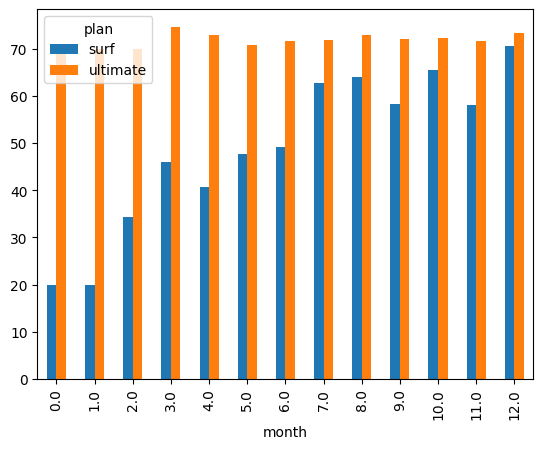

In [98]:
grafik_p4 = df_4.pivot(index = 'month', columns = 'plan', values = 'megaline_fct')
grafik_p4.plot(kind='bar')

Puede ser normal que el plan Ultimated tenga mayor cantidad de ingreso facturado  en cada uno de los meses de manera independiente, ya que es un plan que tiene mayor costo a comparacion con el plan Surf. Sin embargo tambien vamos ha generar un histograma para verificar la proporcion de ingreso.

In [99]:
df4_2 = total_information.pivot(index = ['user_id','month'], columns = 'plan', values = 'megaline_fct')
display(df4_2.head())

plan            surf  ultimate
user_id month                 
1000.0  12.0     NaN      70.0
1001.0  8.0    20.00       NaN
        9.0    20.00       NaN
        10.0   90.09       NaN
        11.0   60.00       NaN

La tabla tiene algunos valores ausentes, sin embargo no los vamos a eliminar, ni tampoco a reeplazar ya que son importantes todas las filas en nuestro histograma.

array([[<Axes: title={'center': 'surf'}>,
        <Axes: title={'center': 'ultimate'}>]], dtype=object)

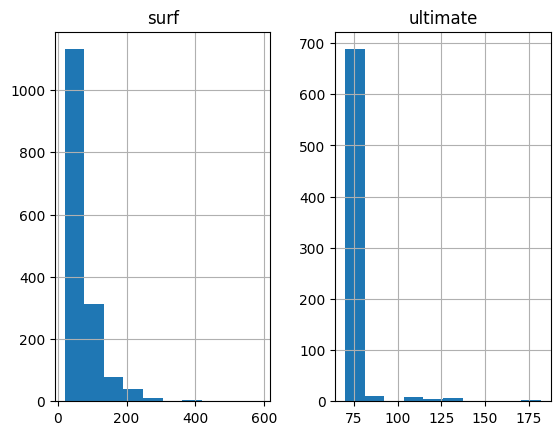

In [100]:
df4_2.hist()

Nuestro gafico de proporcion muestra mayor cantidad de ingreso para  el plan Surf. Esto tambien puede ser considerado, ya que a pesar de que el plan Surf, es mas barato que el plan Ultimated, pues tiene mayor cantidad de usuarios y puede ser un ingreso en volumen importante que podria llegar a igualar o superar al plan Ultimated. sin embargo tambien seria prudente tener una visualizasion mas especifica del ingreso de cada uno de los planes.

<Axes: >

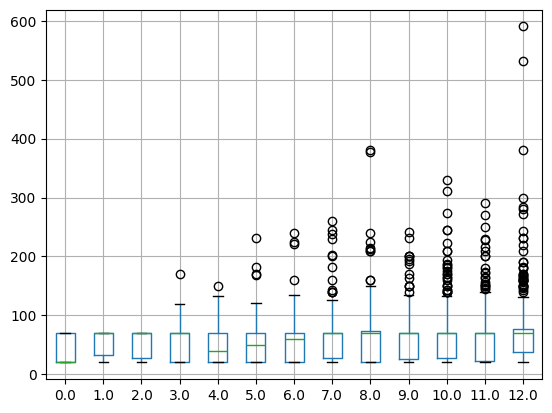

In [101]:
df4_3 = total_information.pivot(index = 'user_id', columns = 'month', values = 'megaline_fct')
df4_3.boxplot()

Nuestro grfico de caja es claro, y muestra una notable inclinacion por el plan Ultimated en cuanto al ingreso del mismo, tenemos pocos valores atipicos, pero tambien representan un ingreso mayor para el plan Ultimated. 

Atravez de todos estos calculos y graficos podremos generar algunas conclusiones importantes:

1. El plan Surf tiene mayor catidad de usuarios que el plan Ultimated.

2. El plan ultimate tiene menor cantidad de ingresoso extra ya que abarca mas minutos, mensajes, y gigabytes de internet que el plan Surf.

3. el plan Sur tiene mayor variacion en sus ingresos extra y totales, por que podria generar mayor cantidad de ingresoos totales que el plan Ultimate.

4. Aunuqe sus valores extras tienen poca variacion. Los servicios de los planes del plan Ultimate son mas caros que los servicios que ofrece el plan Surf, esto podria llevar a pensar que no deririan los ingresos de cada plan y que sea el mismo para ambos planes.

In [102]:
toal_information = total_information['megaline_fct'].fillna(0)

In [103]:
total_information['megaline_fct']

0        70.00
1        20.00
2        20.00
3        90.09
4        60.00
         ...  
2298    100.00
2299     20.00
2300     70.00
2301     40.00
2302     90.00
Name: megaline_fct, Length: 2303, dtype: float64


Antes de generar nuestras hipotesis estadisticas siempre es importante reemplazar los valores ausentres con 0, para no afectar el resultado de las hipotesis

## Prueba las hipótesis estadísticas

Ahora estamos listos para probar nuestra hipotesis  de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.



Elaboramos nuestras hipotesis nula y alternativa y preparamos los datos para el test estadistico a los que los vamos a someter.


Ho : Los ingresos promedios de los usuarios de los planes ultimate y surf son iguales

H1 : Los ingresos promedios de los usuarios son difrentes en cada uno de los planes

In [104]:
# Prueba las hipótesis
df_ultimate = total_information[total_information['plan'] == 'ultimate']
df_surf = total_information[total_information['plan'] == 'surf']  
df_ultimate = df_ultimate.dropna()
df_surf = df_surf.dropna()

In [105]:

df_ultimate_calls = df_ultimate.megaline_fct
df_surf_calls = df_surf.megaline_fct

alpha = 0.01

results = st.ttest_ind(
df_ultimate_calls,
df_surf_calls)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.724423314124219e-08
Rechazamos la hipótesis nula


Observamos, a travez de esta prueba que el valor de alfa  es superado por nuestro valor P asi que  rechazamos la hipotesis nula, la cual nos indica que Los ingresos promedios de los usuarios son difrentes en cada uno de los planes.

Tambien hay probar la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.


Asi que vamos a formular las hipotesis nula y alternativa, y filtraremos 2 series preparadas especificamnete para generar nuestro test estadistico.




Ho : Los usuarios del area de NY-NJ en cuanto a su ingreso promedio, se comportan igual que en otras regiones

H1 : Los usuarios del area de NY-NJ en cuanto a su ingreso promedio, se comportan diferente que en otras regiones

In [106]:
total_infoE = total_information[total_information['city'].str.contains('NY-NJ')]['megaline_fct']
total_infoA = total_information[~total_information['city'].str.contains('NY-NJ')]['megaline_fct']
total_infoE = total_infoE.dropna()
total_infoA = total_infoA.dropna()

In [107]:
alpha = 0.01

results = st.ttest_ind(
total_infoE,
total_infoA)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.04974528277407551
No podemos rechazar la hipótesis nula


Segun los resultados de este test, la hipotesis nula que nos propone que, Los usuarios del area de NY-NJ en cuanto a su ingreso promedio, se comportan igual que en otras regiones es valida.

## Conclusión general

Para finalizar,vamos a  enumerar las conclusiones importantes. Asegurandonos de  abarcar todas las decisiones releventantes que fueron toamdas en cuenta y que determinaron la forma que se eligio, para procesar y analizar los datos.

1. Como primera colclusion podemos hacer enfasis en que, si bien los usuarios del plan Surf, son mayores que los del plan Ultimate. Este ultimo tiene planes mas caros que se equiparan a los ingresos del plan Surf.

2. En cuanto al uso de servicios que superan el plan de cada usuario (servicios extras), el plan Surf tiene mayor variedad de usuarios que han excedido el limite de su plan por mucho y otros que no han superado demasiado su cupo.La variedad es mucho mayor a la del plan Ultimated que si bien tiene pocos exedentes en sus servicios, pues tierne mayor cantidad de servicios qeu el plan Surf.

3. Aunque en primera instancia se pudo haber considerado una mayor significancia de ingresos en el plan Ultimated, gracias a las graficas observamos que ambos planes tienen un ingreso aprecido en volumen, pero tambien hubo meses del año en el que destaco en su mayoria el plan Surf en cuanto al uso de los minutos de lamadas para ser especifo.

4. Las Pruebas hipotesis nos suguieren que no rechacemos la posiblidad de que el ingreso de servicios es igual tanto para el plan Surf, y para el plan Ultimated.

5. Como conlcusion final y despues de realizar un ultimo test estdistico, corroboramos que los ingresos de las ciudades de New York y New Jersey son iguales que los ingresos de otras reguiones del pais. 